<a href="https://colab.research.google.com/github/joannarashid/Work_Absenteeism_ML_project/blob/master/ENGR121_absenteeism_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Data Exploration: Absenteeism at Work

Oscar Alonso, Jeremy Buban, Joanna Rashid, Kahlyn Smith  
Group Term Project  
ENGR 121 Fall 2020

Last modified October 15, 2020

[Link to Google Colab Notebook](https://colab.research.google.com/drive/12z9sKWe5ojWrg33sHm0DzyhKv5pJgMWU?usp=sharing)

## Problem Statement and Background
When employees are absent from work, firms lose out on production, sometimes employees lose wages, and society loses overall productivity.  Since there are many stakeholders affected by workplace absences, an exploration of the factors which contribute to or co-occur with absences would be instructive.  Such information might inform firms’ employee benefit design, operational organization, and even hiring practices.  Analysis of this data might also influence the design of government social programs and public health initiatives.  This analysis might also yield interesting findings that either support or dispel common misconceptions about the reliability of workers of a particular type. 

## Data source
UCI Machine Learning Repository, Absenteeism at work Data Set
(n.d.). Retrieved from https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work#

The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.


> *The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management. (archive.ics.uci.edu)*



## Data Flaws/Weaknesses and Cleaning

Fortunately, this dataset does not have missing values or messy date data. The data cleaning required for this data set will be minimal. However, this data set has only numeric values many of which are codes for strings values rather than continuous or discrete values.  This makes our initial statistics, histograms, and violin plot meaningless for some attributes.  This data does not immediately lend itself to regression analysis. 

Some attributes require context to interpret. One example is the transportation expense, this value can vary depending on context of the person being transported. Some people can take public transport, walk to work, or even carpool. Something like this can skew data sets and result in dirty data which would need cleaning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#data is hosted on github for ease of use of this notebook by multiple users
url = 'https://raw.githubusercontent.com/joannarashid/work_absenteeism/master/Absenteeism_at_work.csv'
df = pd.read_csv(url, sep = ';')

In [ ]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Data types present in this data set:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

## Basic Data Characteristics

Below is a preliminary data exploration of attributes in this dataset and their relationship to the variable of interest, "Absenteeism time in hours."

In general, no single atribute has a very high correlation coefficient.  Coefficients are only useful for dummy and continuous variables.  The histograms and violin plots rendered below are only meaningful for attributes that have continuous numeric data.  The scatter plots rendered below are are not very useful.  However, they do reveal that the independent variable, "Absenteeism time in hours," is not entirely continuous.  It looks like those values are integers that are multiples of 5 or 10.

### Descriptive statistics

In [ ]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Constructing a coefficient matrix and displaying just the coefficents of "Absenteeism time in hours.":

In [ ]:
corr_df = df.corr(method ='pearson') 
corr_df["Absenteeism time in hours"]

ID                                -0.017997
Reason for absence                -0.173116
Month of absence                   0.024345
Day of the week                   -0.124361
Seasons                           -0.005615
Transportation expense             0.027585
Distance from Residence to Work   -0.088363
Service time                       0.019029
Age                                0.065760
Work load Average/day              0.024749
Hit target                         0.026695
Disciplinary failure              -0.124248
Education                         -0.046235
Son                                0.113756
Social drinker                     0.065067
Social smoker                     -0.008936
Pet                               -0.028277
Weight                             0.015789
Height                             0.144420
Body mass index                   -0.049719
Absenteeism time in hours          1.000000
Name: Absenteeism time in hours, dtype: float64

### Histograms

On first glance (considering only variables with truly numeric values), we can see that height, disciplinary failure, son(whether a person has children or not), and day of the week have coefficeints with the greatest magnitude.

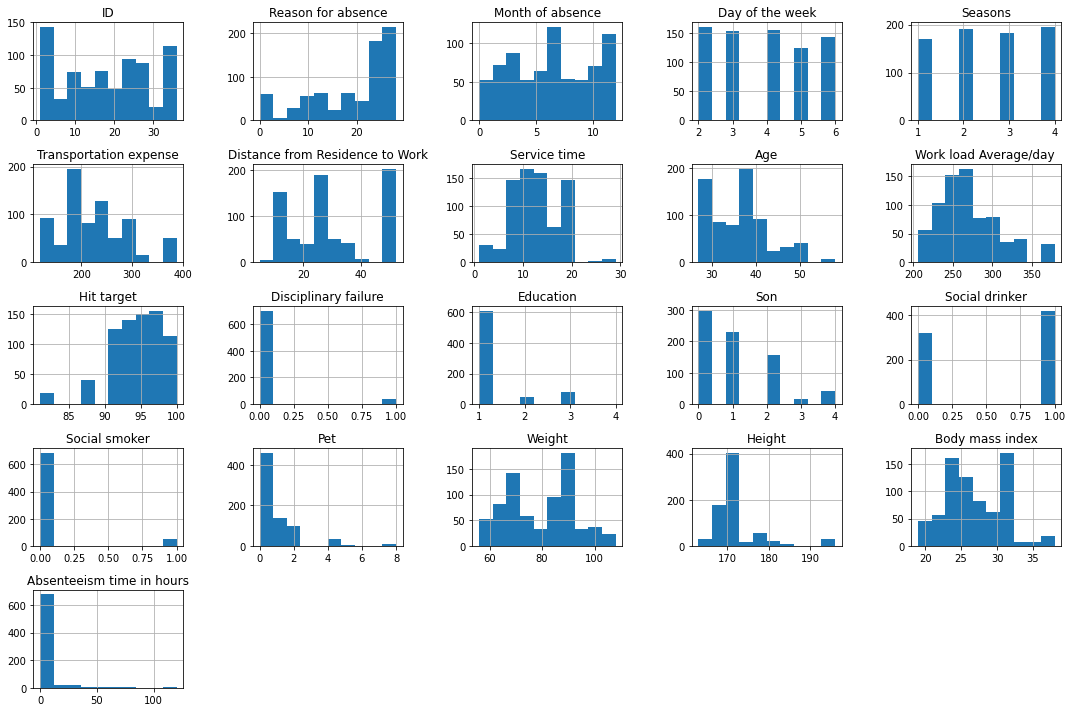

In [ ]:
df.hist(figsize=(15, 10))
plt.tight_layout()

### Scatterplots

Scatter plots of all variables plotted against our variable of interest, "Absenteeism time in hours."

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


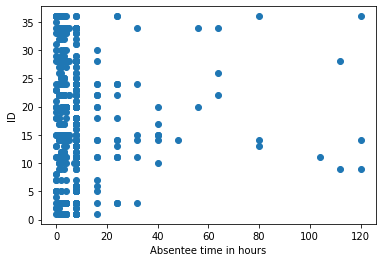

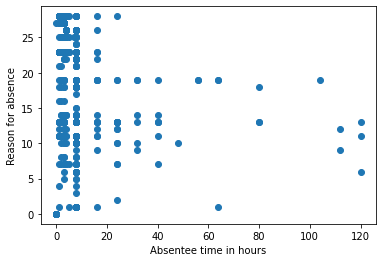

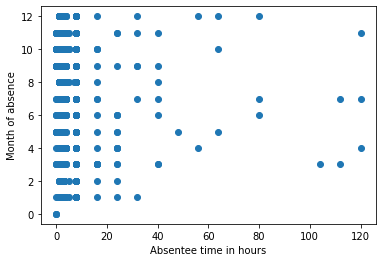

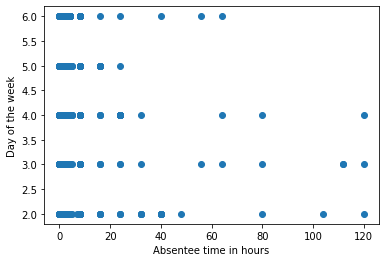

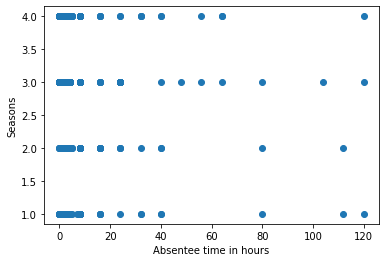

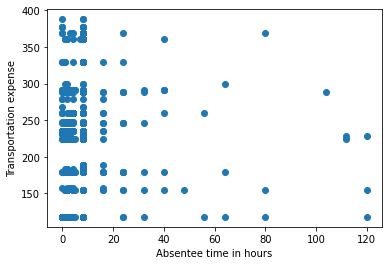

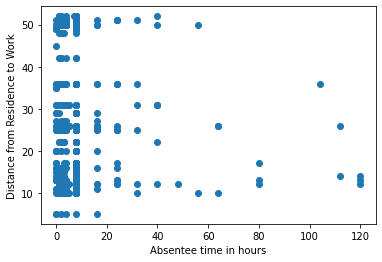

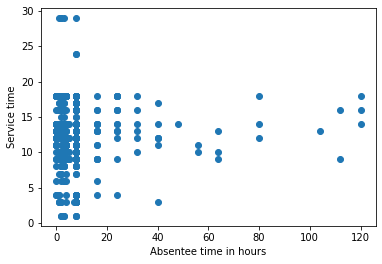

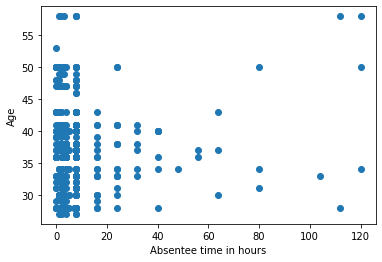

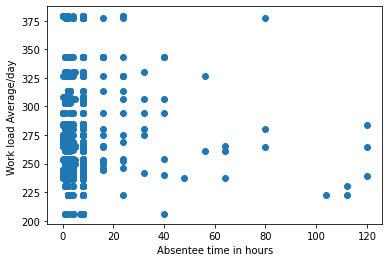

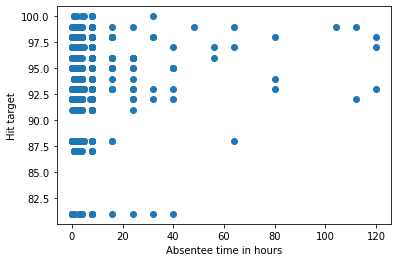

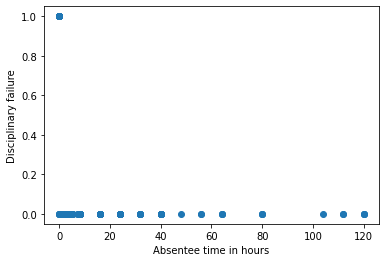

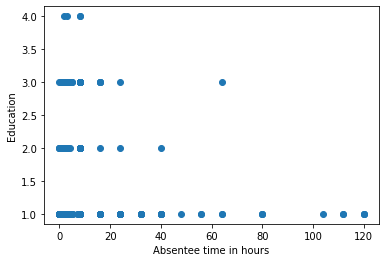

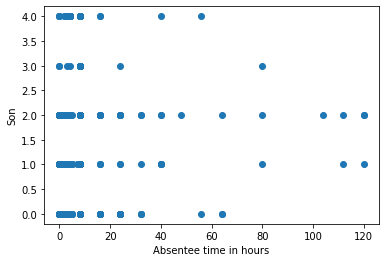

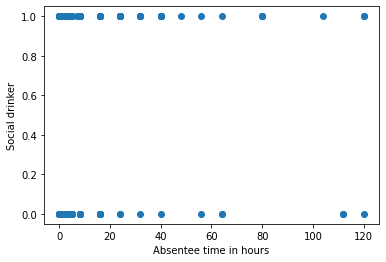

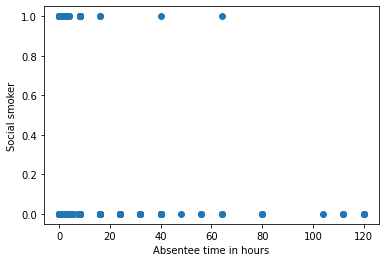

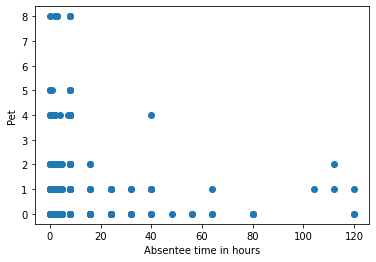

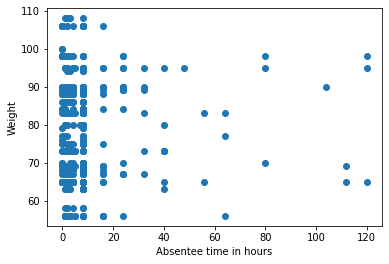

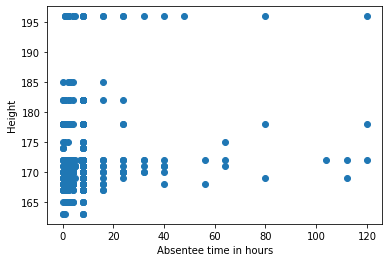

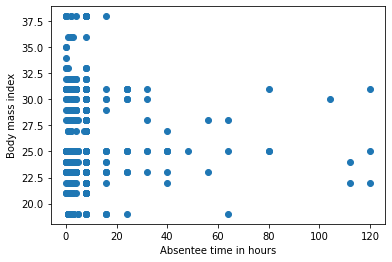

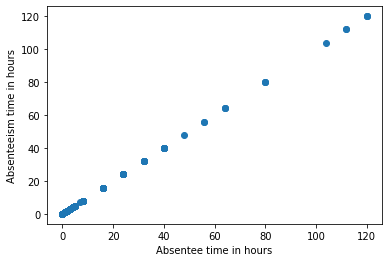

In [ ]:
for column in df:
  plt.figure()
  plt.subplot(1, 1, 1)
  plt.scatter(df['Absenteeism time in hours'], df[column])
  plt.xlabel('Absentee time in hours')
  plt.ylabel(str(column))

These scatter plots helped us see that the "Absenteeism time" variable is not continuous.

###Violin plots

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/

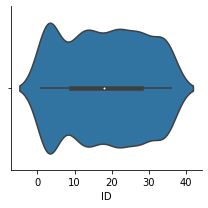

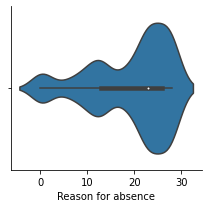

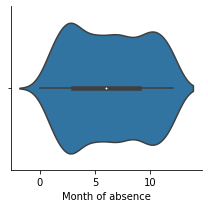

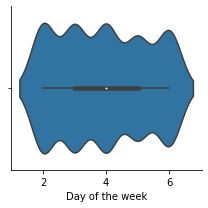

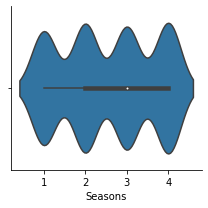

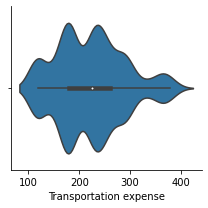

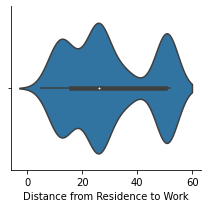

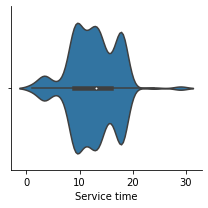

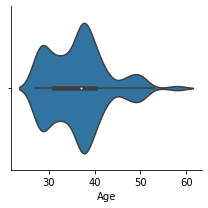

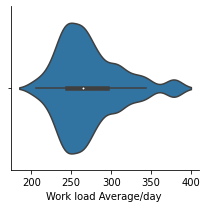

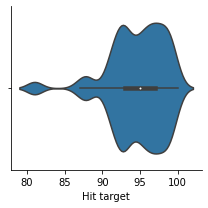

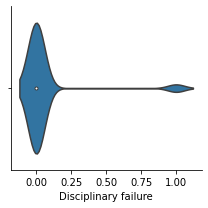

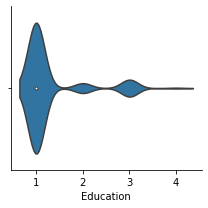

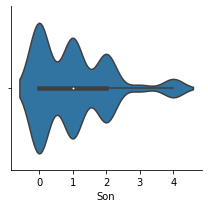

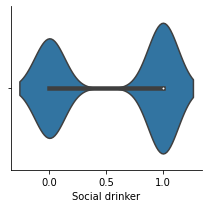

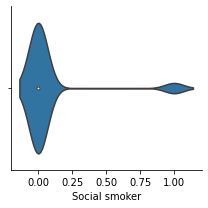

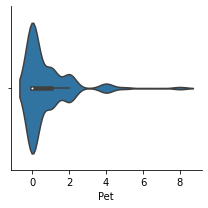

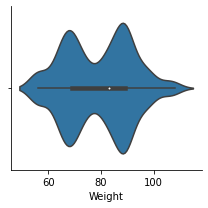

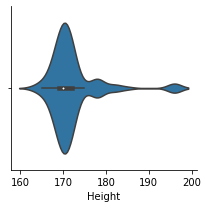

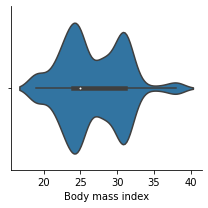

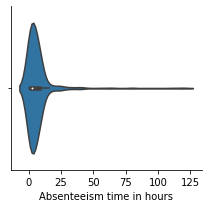

In [ ]:
for column in df:
  g = sns.FacetGrid(df)
  g.map(sns.violinplot, column)

## Surprises

It is suprising that having children and/or pets is not very closely correlated with absenteeism.  In fact, these factors were slightly negatively correlated with work absence.  The relatively low coefficient values suggest that no single employee attribute is a major determinant of absenteeism.  It was also surprising that employee absences were spread roughly evenly accross the week.  We expected them to be heavily skewed towards the beginning and end of the workweek.

### Next Steps

The following variables are catagorical and will need to be converted to or duplicated as strings for further more meaningful data visualization and use of cluster analysis.

*   Reason for absence
*   Season
*   Day of the week
*   Month

For "reason for absence" instead of converting to string values, we will create a dictionary of absence reasons.

We will use cluster analysis and random forest analysis to look for groups of attributes that together are associated with work absences.  We can also look at attributes that are associated with specific reasons for work absence.

We will use multi-variate regression analysis to evaluate these attributes' joint significance.

Once we have identified jointly significant attributes, we will use faceted data visualization to visualize the relationships between three variables at a time.

We will do additional data visualization to illustrate clusers.